# Activity: Explore descriptive statistics

## **Introduction**

Data professionals often use descriptive statistics to understand the data they are working with and provide collaborators with a summary of the relative location of values in the data, as well an information about its spread. 

This activity is to analyze air quality data with respect to carbon monoxide, a major air pollutant. The data includes information from more than 200 sites, identified by state, county, city, and local site names. The goal to use Python functions to gather statistics about air quality, then share insights with stakeholders to improve.

In [1]:
# Import relevant Python libraries.

### YOUR CODE HERE ###
import pandas as pd 
import numpy as np 
import seaborn as sns 
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

## **Step 2: Data exploration** 

In [3]:
# Display first 10 rows of the data.

epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [4]:
# Get descriptive stats.

epa_data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


The 25th percentile for the `aqi` column is 2. This means that 25% of the aqi values in the data are below 2. Also means that 25% of the cities have aqi below 2.
The 75th percentile for the aqi column is 9. This means that 75% of the aqi values in the data are below 9.

## **Step 3: Statistical tests** 

In [5]:
# Get descriptive stats about the states in the data.

epa_data["state_name"].describe()

count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

## **Step 4. Results and evaluation**

In [6]:
# Compute the mean value from the aqi column.

mean_api=np.mean(epa_data["aqi"])
rounded_mean_api=round(mean_api,2)
print((rounded_mean_api))

6.76


In [7]:
# Compute the median value from the aqi column.

np.median(epa_data["aqi"])

5.0

In [8]:
# Identify the minimum value from the aqi column.

np.min(epa_data["aqi"])

0

In [9]:
# Identify the maximum value from the aqi column.

np.max(epa_data["aqi"])

50

In [10]:
 np.std(epa_data["aqi"])

7.048113390607722

The standard deviation for the aqi column is approximately 7.05 (rounding to 2 decimal places here). This is a measure of how spread out the aqi values are in the data. 

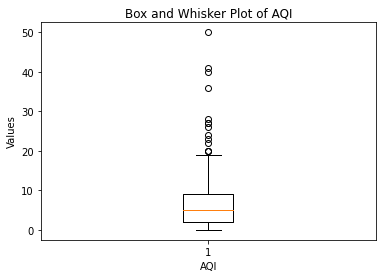

In [23]:
plt.boxplot(epa_data["aqi"])
plt.title("Box and Whisker Plot of AQI")
plt.xlabel("AQI")
plt.ylabel("Values")
plt.show()

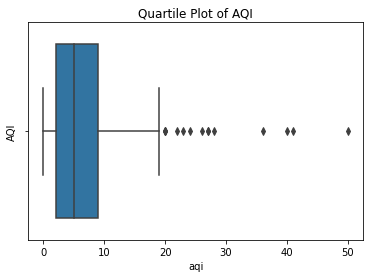

In [25]:
sns.boxplot(x=epa_data["aqi"])
plt.title("Quartile Plot of AQI")
plt.ylabel("AQI")
plt.show()

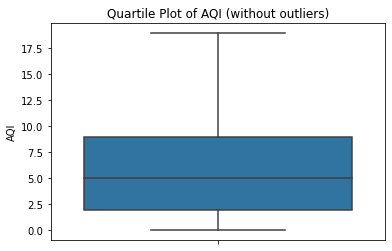

In [26]:
sns.boxplot(y=epa_data["aqi"], showfliers=False)
plt.title("Quartile Plot of AQI (without outliers)")
plt.ylabel("AQI")
plt.show()


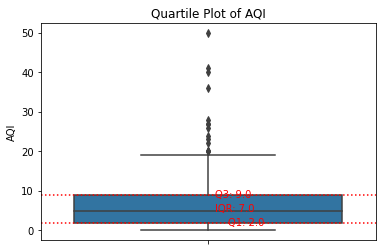

In [51]:
sns.boxplot(y=epa_data["aqi"])
plt.title("Quartile Plot of AQI")
plt.ylabel("AQI")

# Calculate the quartiles
q1 = epa_data["aqi"].quantile(0.25)
q3 = epa_data["aqi"].quantile(0.75)
iqr = q3 - q1

# Plot the dotted lines for the IQR
plt.axhline(q1, color='r', linestyle='dotted')
plt.axhline(q3, color='r', linestyle='dotted')

# Add text annotations
plt.text(0.06, q1, f'Q1: {q1}', va='center', ha='left', color='r')
plt.text(0.02, q3, f'Q3: {q3}', va='center', ha='left', color='r')
plt.text(0.02, q1 + (iqr / 2), f'IQR: {iqr}', va='center', ha='left', color='r')

plt.show()

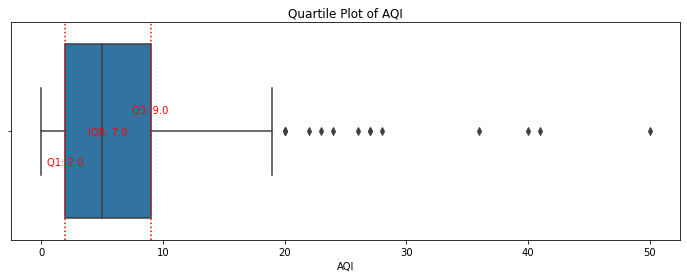

In [69]:
# Assuming you have the necessary DataFrame and the "aqi" column exists

plt.figure(figsize=(12, 4))  # Set the figure size as desired

sns.boxplot(x=epa_data["aqi"])
plt.title("Quartile Plot of AQI")
plt.xlabel("AQI")

# Calculate the quartiles
q1 = epa_data["aqi"].quantile(0.25)
q3 = epa_data["aqi"].quantile(0.75)
iqr = q3 - q1

# Plot the dotted lines for the IQR
plt.axvline(q1, color='r', linestyle='dotted')
plt.axvline(q3, color='r', linestyle='dotted')

# Add text annotations within the plot area
plt.text(q1, 0.12, f'Q1: {q1}', va='top', ha='center', color='r')
plt.text(q3, -0.12, f'Q3: {q3}', va='top', ha='center', color='r')
plt.text(q1 + (iqr / 2), -0.02, f'IQR: {iqr}', va='top', ha='center', color='r')

plt.show()

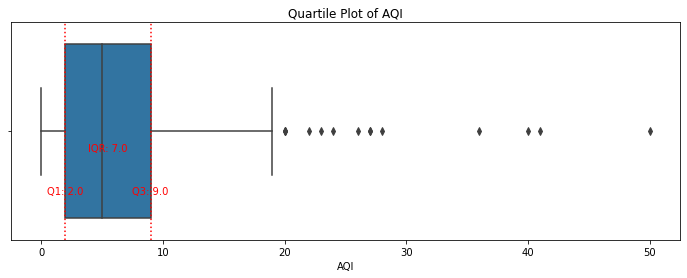

In [75]:
plt.figure(figsize=(12, 4))  # Set the figure size as desired

sns.boxplot(x=epa_data["aqi"])
plt.title("Quartile Plot of AQI")
plt.xlabel("AQI")

# Calculate the quartiles
q1 = epa_data["aqi"].quantile(0.25)
q3 = epa_data["aqi"].quantile(0.75)
iqr = q3 - q1

# Plot the dotted lines for the IQR
plt.axvline(q1, color='r', linestyle='dotted')
plt.axvline(q3, color='r', linestyle='dotted')

# Add text annotations outside the plot area aligned with the dotted lines
plt.text(q1, + 0.3, f'Q1: {q1}', va='bottom', ha='center', color='r')
plt.text(q3, min(epa_data["aqi"]) + 0.3, f'Q3: {q3}', va='bottom', ha='center', color='r')
plt.text(q1 + (iqr / 2), min (epa_data["aqi"]) + 0.10, f'IQR: {iqr}', va='bottom', ha='center', color='r')

plt.show()

## **Considerations**


**What are some key takeaways that you learned during this lab?**

[Write your response here. Double-click (or enter) to edit.]

**How would you present your findings from this lab to others? Consider the following relevant points noted by AirNow.gov as you respond:**
- "AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is considered to be unhealthy—at first for certain sensitive groups of people, then for everyone as AQI values increase."
- "An AQI of 100 for carbon monoxide corresponds to a level of 9.4 parts per million."

[Write your response here. Double-click (or enter) to edit.]

[Write your response here. Double-click (or enter) to edit.]

**References**

[Air Quality Index - A Guide to Air Quality and Your Health](https://www.airnow.gov/sites/default/files/2018-04/aqi_brochure_02_14_0.pdf). (2014,February)

[Numpy.Std — NumPy v1.23 Manual](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

US EPA, OAR. (2014, 8 July).[*Air Data: Air Quality Data Collected at Outdoor Monitors Across the US*](https://www.epa.gov/outdoor-air-quality-data). 